In [ ]:
all_data_concat.to_csv("./data/riss_bigdata.csv", index=False, encoding="utf-8")

## 영단어 키워드 분석

#### 패키지 설치

In [17]:
# wordcloud 패키지 설치
!pip install wordcloud

In [18]:
# 자연어처리 패키지 설치
!pip install nltk

#### 패키지 import

In [19]:
import pandas as pd
import glob
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import  Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

### NLTK 리소스 최초 한번 다운로드

- 다른 팝업 창에서 필요한 것들 다운로드

In [20]:
import nltk

In [21]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [22]:
# 파일 병합
all_files = glob.glob("./data/myCabinetExcelData*.xls")
all_files

['./data\\myCabinetExcelData (1).xls',
 './data\\myCabinetExcelData (2).xls',
 './data\\myCabinetExcelData (3).xls',
 './data\\myCabinetExcelData (4).xls',
 './data\\myCabinetExcelData.xls']

In [23]:
!pip install xlrd

In [24]:
all_data = []
for file in all_files:
    df = pd.read_excel(file)
    all_data.append(df)

all_data[1]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Big earth data analytics on Sentinel-1 and Lan...,"Corbane, Christina; Pesaresi, Martino; Politis...",John Wiley & Sons Ltd,2017
1,NaN,2,Big spatial vector data management: a review,"Yao, Xiaochuang; Li, Guoqing",John Wiley & Sons Ltd,2018
2,NaN,3,Big earth data for achieving the sustainable d...,"Chen, Fang; Sun, Zhongchang",John Wiley & Sons Ltd,2022
3,NaN,4,Evaluating the role of partnerships in increas...,"Mohamed-Ghouse, Zaffar Sadiq; Desha, Cheryl; R...",John Wiley & Sons Ltd,2021
4,NaN,5,"Geospatial semantics, ontology and knowledge g...","Zhu, Yunqiang",John Wiley & Sons Ltd,2019
...,...,...,...,...,...,...
95,NaN,96,Predicting the ratings of Amazon products usin...,"Woo, Jongwook; Mishra, Monika",John Wiley & Sons Ltd,2021
96,NaN,97,Supervised compression of big data,"Joseph, V. Roshan; Mak, Simon","John Wiley & Sons, Ltd",2021
97,NaN,98,Advancing science and technology with big data...,"Li, Jia","John Wiley & Sons, Ltd",2018
98,NaN,99,Distributed subdata selection for big data via...,"Zhang, Haixiang; Wang, HaiYing","Elsevier Science B.V., Amsterdam.",2021


In [25]:
all_data_concat = pd.concat(all_data, axis=0, ignore_index=True)
all_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Agricultural Disaster Risk Management and Capa...,"Wang, Caili; Gao, Yuwen; Aziz, Asad; Ogunmola,...",Mary Ann Leibert,2022
1,NaN,2,Big data ensemble clinical prediction for heal...,"Rallapalli, Sreekanth; Gondkar, R.R.",Inderscience,2018
2,NaN,3,Big Data and Predictive Analytics in Health Care,unknown,Mary Ann Leibert,2014
3,NaN,4,Big Data As an Enabler of Primary Education,unknown,Mary Ann Leibert,2016
4,NaN,5,Correction to: Big Data 2016;4:60–66,unknown,Mary Ann Leibert,2016
...,...,...,...,...,...,...
495,NaN,96,Artificial Bee Colony Reinforced Extended Kalm...,"Raghav, R. Srinivasa; Thirugnanasambandam, Kal...",Mary Ann Leibert,2022
496,NaN,97,Why Big Data = Big Deal,unknown,Mary Ann Leibert,2014
497,NaN,98,Big Data 2.0: Cataclysm or Catalyst?,unknown,Mary Ann Leibert,2014
498,NaN,99,Curating Big Data Made Simple: Perspectives fr...,unknown,Mary Ann Leibert,2014


In [31]:
all_data_concat = all_data_concat.drop(all_data_concat.columns[[0]], axis= "columns")
all_data_concat

,제목,저자,출판사,출판일
0,Agricultural Disaster Risk Management and Capa...,"Wang, Caili; Gao, Yuwen; Aziz, Asad; Ogunmola,...",Mary Ann Leibert,2022
1,Big data ensemble clinical prediction for heal...,"Rallapalli, Sreekanth; Gondkar, R.R.",Inderscience,2018
2,Big Data and Predictive Analytics in Health Care,unknown,Mary Ann Leibert,2014
3,Big Data As an Enabler of Primary Education,unknown,Mary Ann Leibert,2016
4,Correction to: Big Data 2016;4:60–66,unknown,Mary Ann Leibert,2016
...,...,...,...,...
495,Artificial Bee Colony Reinforced Extended Kalm...,"Raghav, R. Srinivasa; Thirugnanasambandam, Kal...",Mary Ann Leibert,2022
496,Why Big Data = Big Deal,unknown,Mary Ann Leibert,2014
497,Big Data 2.0: Cataclysm or Catalyst?,unknown,Mary Ann Leibert,2014
498,Curating Big Data Made Simple: Perspectives fr...,unknown,Mary Ann Leibert,2014


In [34]:
all_data_concat.to_csv("./data/riss_bigdata.csv", index=False, encoding="utf-8")

In [27]:
all_title = all_data_concat["제목"]
all_title

0      Agricultural Disaster Risk Management and Capa...
1      Big data ensemble clinical prediction for heal...
2       Big Data and Predictive Analytics in Health Care
3            Big Data As an Enabler of Primary Education
4                   Correction to: Big Data 2016;4:60–66
                             ...                        
495    Artificial Bee Colony Reinforced Extended Kalm...
496                              Why Big Data = Big Deal
497                 Big Data 2.0: Cataclysm or Catalyst?
498    Curating Big Data Made Simple: Perspectives fr...
499                       The Uses of Big Data in Cities
Name: 제목, Length: 500, dtype: object

In [33]:
stopWords = set(stopwords.words("english"))
stopWords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [35]:
lemma = WordNetLemmatizer()

In [40]:
import re

In [64]:
words = []

for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title))
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]

    words.append(EnWordsTokenStopLemma)

In [65]:
print(words) #불용어 제거 후 남은 키워드 단어만 남음

[['agricultural', 'disaster', 'risk', 'management', 'capability', 'assessment', 'using', 'big', 'data', 'analytics'], ['big', 'data', 'ensemble', 'clinical', 'prediction', 'healthcare', 'data', 'using', 'deep', 'learning', 'model'], ['big', 'data', 'predictive', 'analytics', 'health', 'care'], ['big', 'data', 'enabler', 'primary', 'education'], ['correction', 'big', 'data'], ['unsupervised', 'tensor', 'mining', 'big', 'data', 'practitioner'], ['comparison', 'scalability', 'batch', 'big', 'data', 'processing', 'apache', 'spark', 'apache', 'flink'], ['call', 'special', 'issue', 'paper', 'deep', 'learning', 'assisted', 'big', 'data', 'analytics', 'biomedical', 'application', 'digital', 'healthcare'], ['call', 'special', 'issue', 'paper', 'big', 'data', 'business'], ['big', 'data', 'analytics', 'data', 'management', 'perspective', 'public', 'administration'], ['exploiting', 'reused', 'based', 'sharing', 'work', 'opportunity', 'big', 'data', 'multiquery', 'optimization', 'flink'], ['using',

In [66]:
# 2차원리스트 -> 1차원 리스트 (차원 축소)
words_reduce = list(reduce(lambda x, y : x+y, words))
print(words_reduce)

['agricultural', 'disaster', 'risk', 'management', 'capability', 'assessment', 'using', 'big', 'data', 'analytics', 'big', 'data', 'ensemble', 'clinical', 'prediction', 'healthcare', 'data', 'using', 'deep', 'learning', 'model', 'big', 'data', 'predictive', 'analytics', 'health', 'care', 'big', 'data', 'enabler', 'primary', 'education', 'correction', 'big', 'data', 'unsupervised', 'tensor', 'mining', 'big', 'data', 'practitioner', 'comparison', 'scalability', 'batch', 'big', 'data', 'processing', 'apache', 'spark', 'apache', 'flink', 'call', 'special', 'issue', 'paper', 'deep', 'learning', 'assisted', 'big', 'data', 'analytics', 'biomedical', 'application', 'digital', 'healthcare', 'call', 'special', 'issue', 'paper', 'big', 'data', 'business', 'big', 'data', 'analytics', 'data', 'management', 'perspective', 'public', 'administration', 'exploiting', 'reused', 'based', 'sharing', 'work', 'opportunity', 'big', 'data', 'multiquery', 'optimization', 'flink', 'using', 'big', 'data', 'unders

In [67]:
count = Counter(words_reduce)
count

Counter({'agricultural': 3,
         'disaster': 6,
         'risk': 4,
         'management': 15,
         'capability': 4,
         'assessment': 4,
         'using': 29,
         'big': 521,
         'data': 565,
         'analytics': 88,
         'ensemble': 3,
         'clinical': 3,
         'prediction': 7,
         'healthcare': 8,
         'deep': 9,
         'learning': 24,
         'model': 26,
         'predictive': 4,
         'health': 14,
         'care': 5,
         'enabler': 1,
         'primary': 1,
         'education': 6,
         'correction': 3,
         'unsupervised': 1,
         'tensor': 4,
         'mining': 14,
         'practitioner': 1,
         'comparison': 2,
         'scalability': 1,
         'batch': 1,
         'processing': 19,
         'apache': 4,
         'spark': 5,
         'flink': 2,
         'call': 29,
         'special': 32,
         'issue': 36,
         'paper': 28,
         'assisted': 3,
         'biomedical': 3,
         'applicatio

In [68]:
word_count = dict()

for tag, counts in count.most_common(10):
    if (len(str(tag)) > 1) :
        word_count[tag] = counts
        #print(f"{tag} : {counts}")

word_count

{'data': 565,
 'big': 521,
 'analytics': 88,
 'based': 47,
 'analysis': 40,
 'issue': 36,
 'system': 36,
 'special': 32,
 'approach': 32,
 'using': 29}

#### 단어개수 차트

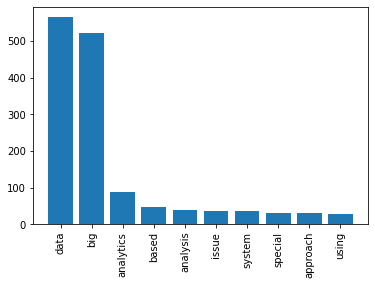

In [69]:
sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.Figure(figsize=(20,5))
plt.bar(range(len(word_count)), sorted_Values, align="center")
plt.xticks(range(len(word_count)),list(sorted_Keys), rotation=90)
plt.show()

#### 결과 시각화

In [71]:
all_data_concat["doc_count"] = 0
#all_data_concat
summary_year = all_data_concat.groupby("출판일", as_index=False)["doc_count"].count()
summary_year

,출판일,doc_count
0,1999,1
1,2004,1
2,2011,1
3,2012,8
4,2013,12
5,2014,44
6,2015,43
7,2016,73
8,2017,78
9,2018,67


([<matplotlib.axis.XTick at 0x1dd28227790>,
 [Text(0, 0, '1999'),
  Text(1, 0, '2004'),
  Text(2, 0, '2011'),
  Text(3, 0, '2012'),
  Text(4, 0, '2013'),
  Text(5, 0, '2014'),
  Text(6, 0, '2015'),
  Text(7, 0, '2016'),
  Text(8, 0, '2017'),
  Text(9, 0, '2018'),
  Text(10, 0, '2019'),
  Text(11, 0, '2020'),
  Text(12, 0, '2021'),
  Text(13, 0, '2022')])

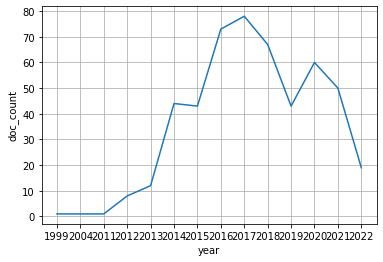

In [74]:
plt.Figure(figsize=(12,5))
plt.xlabel("year")
plt.ylabel("doc_count")
plt.grid(True)
plt.plot(range(len(summary_year)), summary_year["doc_count"])
plt.xticks(range(len(summary_year)), [text for text in summary_year["출판일"]])

#### 워드클라우드

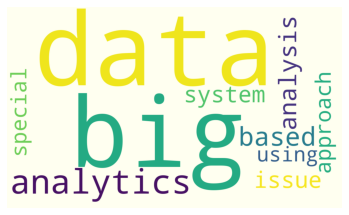

In [83]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color="ivory", stopwords=stopwords, width=1280, height=768)
cloud = wc.generate_from_frequencies(word_count)

plt.Figure(figsize=(40,8))
plt.imshow(cloud)
plt.axis("off")
plt.show()

In [84]:
# png로 저장
cloud.to_file("./data/riss_bigdata_wordcloud.png")